<a href="https://colab.research.google.com/github/rishavnitjsr/Game_RPS/blob/main/Tumor_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing Libraries

In [ ]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('dark_background')
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# One Hot Encoding

In [ ]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])
# 0 - Tumor
# 1 - Normal

OneHotEncoder()

# Preprocessing

In [ ]:
# This cell updates result list for images with tumor
data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/brain-mri-images-for-brain-tumor-detection/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [ ]:
# This cell updates result list for images without tumor

paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/brain-mri-images-for-brain-tumor-detection/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [ ]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [ ]:
result = np.array(result)
result = result.reshape(139,2)

In [ ]:
result.shape

(139, 2)

# Training vs Test Split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

# Model Building

In [ ]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

model.compile(loss = "categorical_crossentropy", optimizer='adam', metrics = ['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 128, 128, 32)      416       
                                                                 
 conv2d_5 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_2 (Bat  (None, 128, 128, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 64, 64, 32)        0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 64, 64, 32)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 64, 64, 64)       

In [ ]:
y_train.shape

(111, 2)

In [ ]:
history = model.fit(x_train, y_train, epochs = 100,verbose = 1, validation_data = (x_test, y_test))

Epoch 1/100
4/4 [==============================] - 13s 2s/step - loss: 24.2537 - accuracy: 0.6126 - val_loss: 43.0133 - val_accuracy: 0.5714
Epoch 2/100
4/4 [==============================] - 10s 3s/step - loss: 13.2993 - accuracy: 0.6937 - val_loss: 36.7150 - val_accuracy: 0.5714
Epoch 3/100
4/4 [==============================] - 8s 2s/step - loss: 3.7660 - accuracy: 0.8468 - val_loss: 21.6688 - val_accuracy: 0.6429
Epoch 4/100
4/4 [==============================] - 10s 2s/step - loss: 2.4920 - accuracy: 0.9279 - val_loss: 48.3179 - val_accuracy: 0.5000
Epoch 5/100
4/4 [==============================] - 10s 3s/step - loss: 2.6958 - accuracy: 0.9009 - val_loss: 27.7963 - val_accuracy: 0.5714
Epoch 6/100
4/4 [==============================] - 10s 3s/step - loss: 0.5665 - accuracy: 0.9550 - val_loss: 12.1343 - val_accuracy: 0.6071
Epoch 7/100
4/4 [==============================] - 9s 2s/step - loss: 0.2452 - accuracy: 0.9640 - val_loss: 12.0708 - val_accuracy: 0.7500
Epoch 8/100
4/4 [===

# Plotting Graph

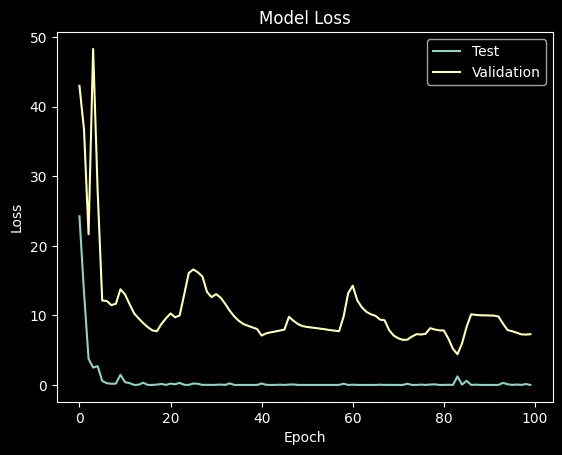

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

# Testing

In [ ]:
def names(number):
    if number==0:
        return 'Its a Tumor'
    else:
        return 'No, Its not a tumor'

100.0% Confidence This Is No, Its not a tumor


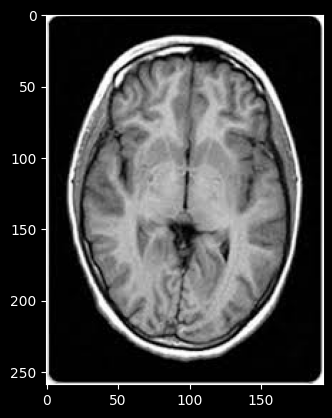

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain-mri-images-for-brain-tumor-detection/no/20 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is ' + names(classification))

100.0% Confidence This Is A Its a Tumor


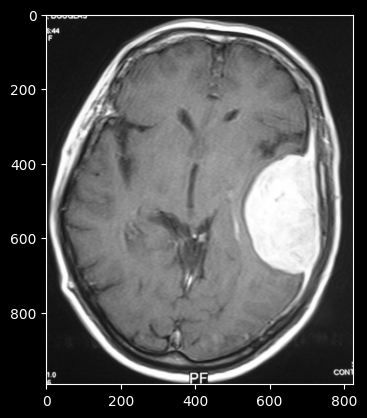

In [ ]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain-mri-images-for-brain-tumor-detection/yes/Y103.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% Confidence This Is A ' + names(classification))

# Classification Report

In [ ]:
from sklearn.metrics import classification_report

test_predictions = model.predict(x_test)
test_predictions = (test_predictions > 0.5).astype(int)  # Convert probabilities to binary predictions

# Generate classification report
report = classification_report(y_test, test_predictions)

# Print classification report
print(report)

# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_test, test_predictions)
print("Accuracy: ",score)

1/1 [==============================] - 1s 967ms/step
              precision    recall  f1-score   support

           0       0.83      0.71      0.77        14
           1       0.75      0.86      0.80        14

   micro avg       0.79      0.79      0.79        28
   macro avg       0.79      0.79      0.78        28
weighted avg       0.79      0.79      0.78        28
 samples avg       0.79      0.79      0.79        28

Accuracy:  0.7857142857142857


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(y_test, test_predictions, average='weighted')
recall = recall_score(y_test, test_predictions, average='micro')
f1 = f1_score(y_test, test_predictions, average='macro')

# Print precision, recall, and F1-score
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7916666666666667
Recall: 0.7857142857142857
F1-score: 0.7846153846153845
